In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
median_values = df.median(numeric_only=True)
print("\nMedian Values:\n", median_values)


Median Values:
 PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64


In [8]:
std_values = df.std(numeric_only=True)
print("\nStandard Deviation:\n", std_values)


Standard Deviation:
 PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64


In [9]:
mean_values = df.mean(numeric_only=True)
print("\nMean Values:\n", mean_values)


Mean Values:
 PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Create Histograms for Numeric Features

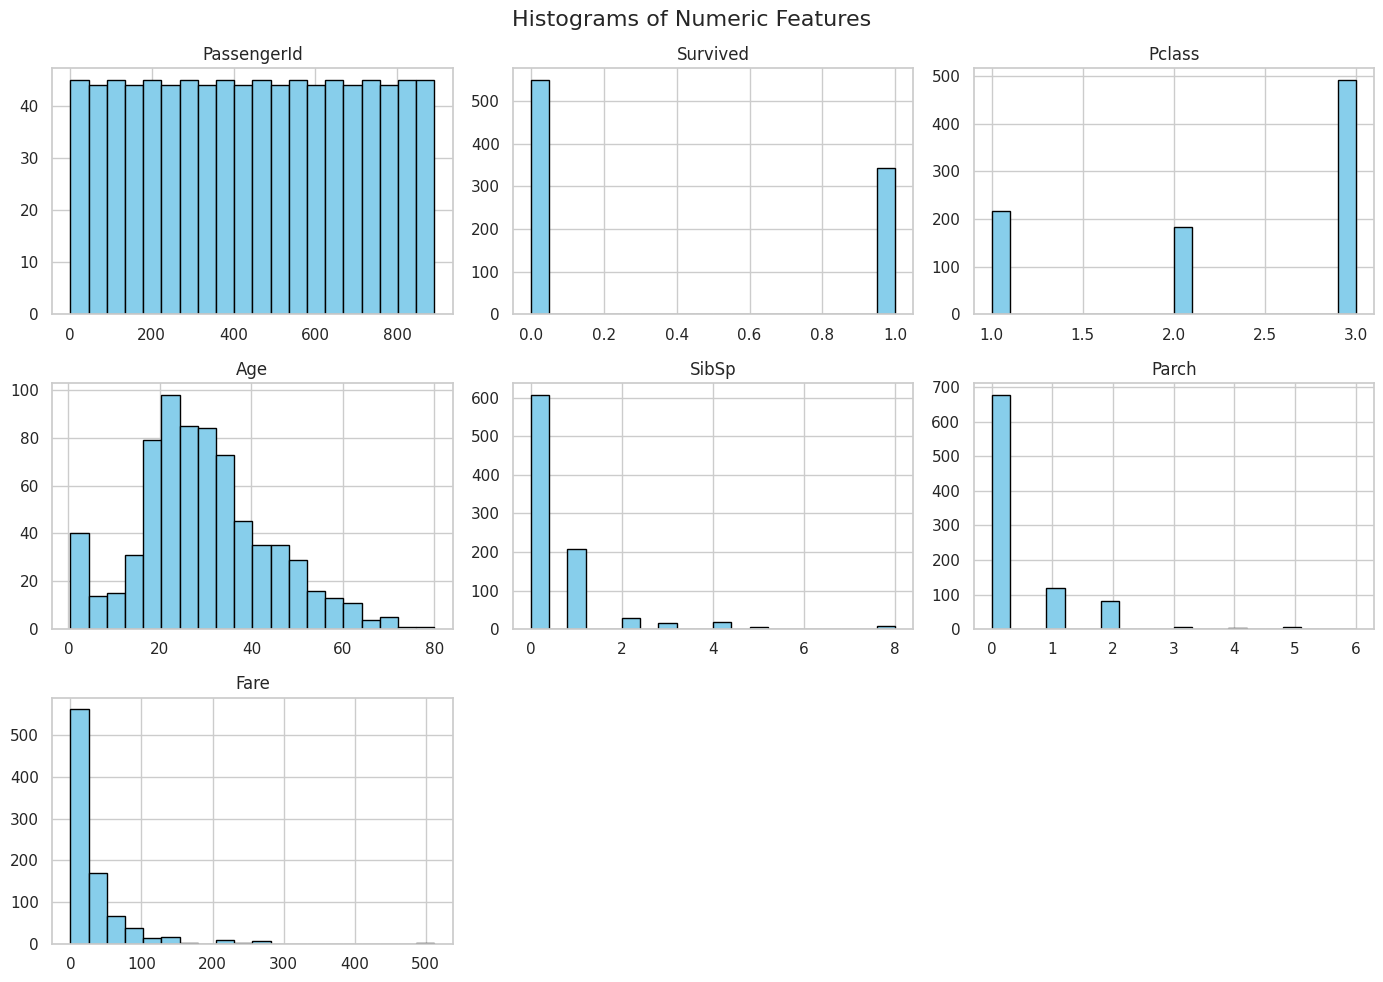

In [11]:
sns.set(style="whitegrid")
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
numeric_cols.hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

Create Boxplots for Numeric Features

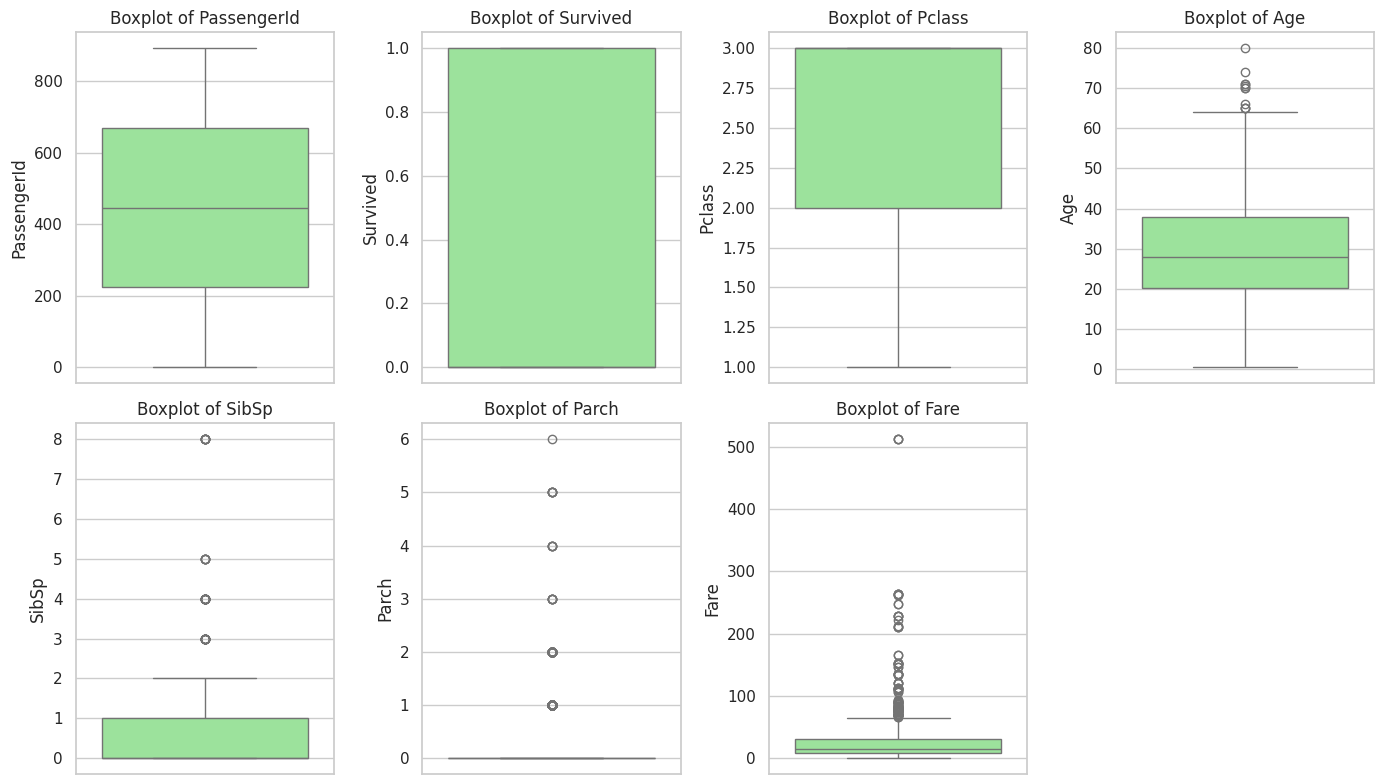

In [12]:
plt.figure(figsize=(14, 8))
for i, column in enumerate(numeric_cols.columns, 1):
    plt.subplot(2, len(numeric_cols.columns) // 2 + 1, i)
    sns.boxplot(y=df[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Pairplot using Seaborn

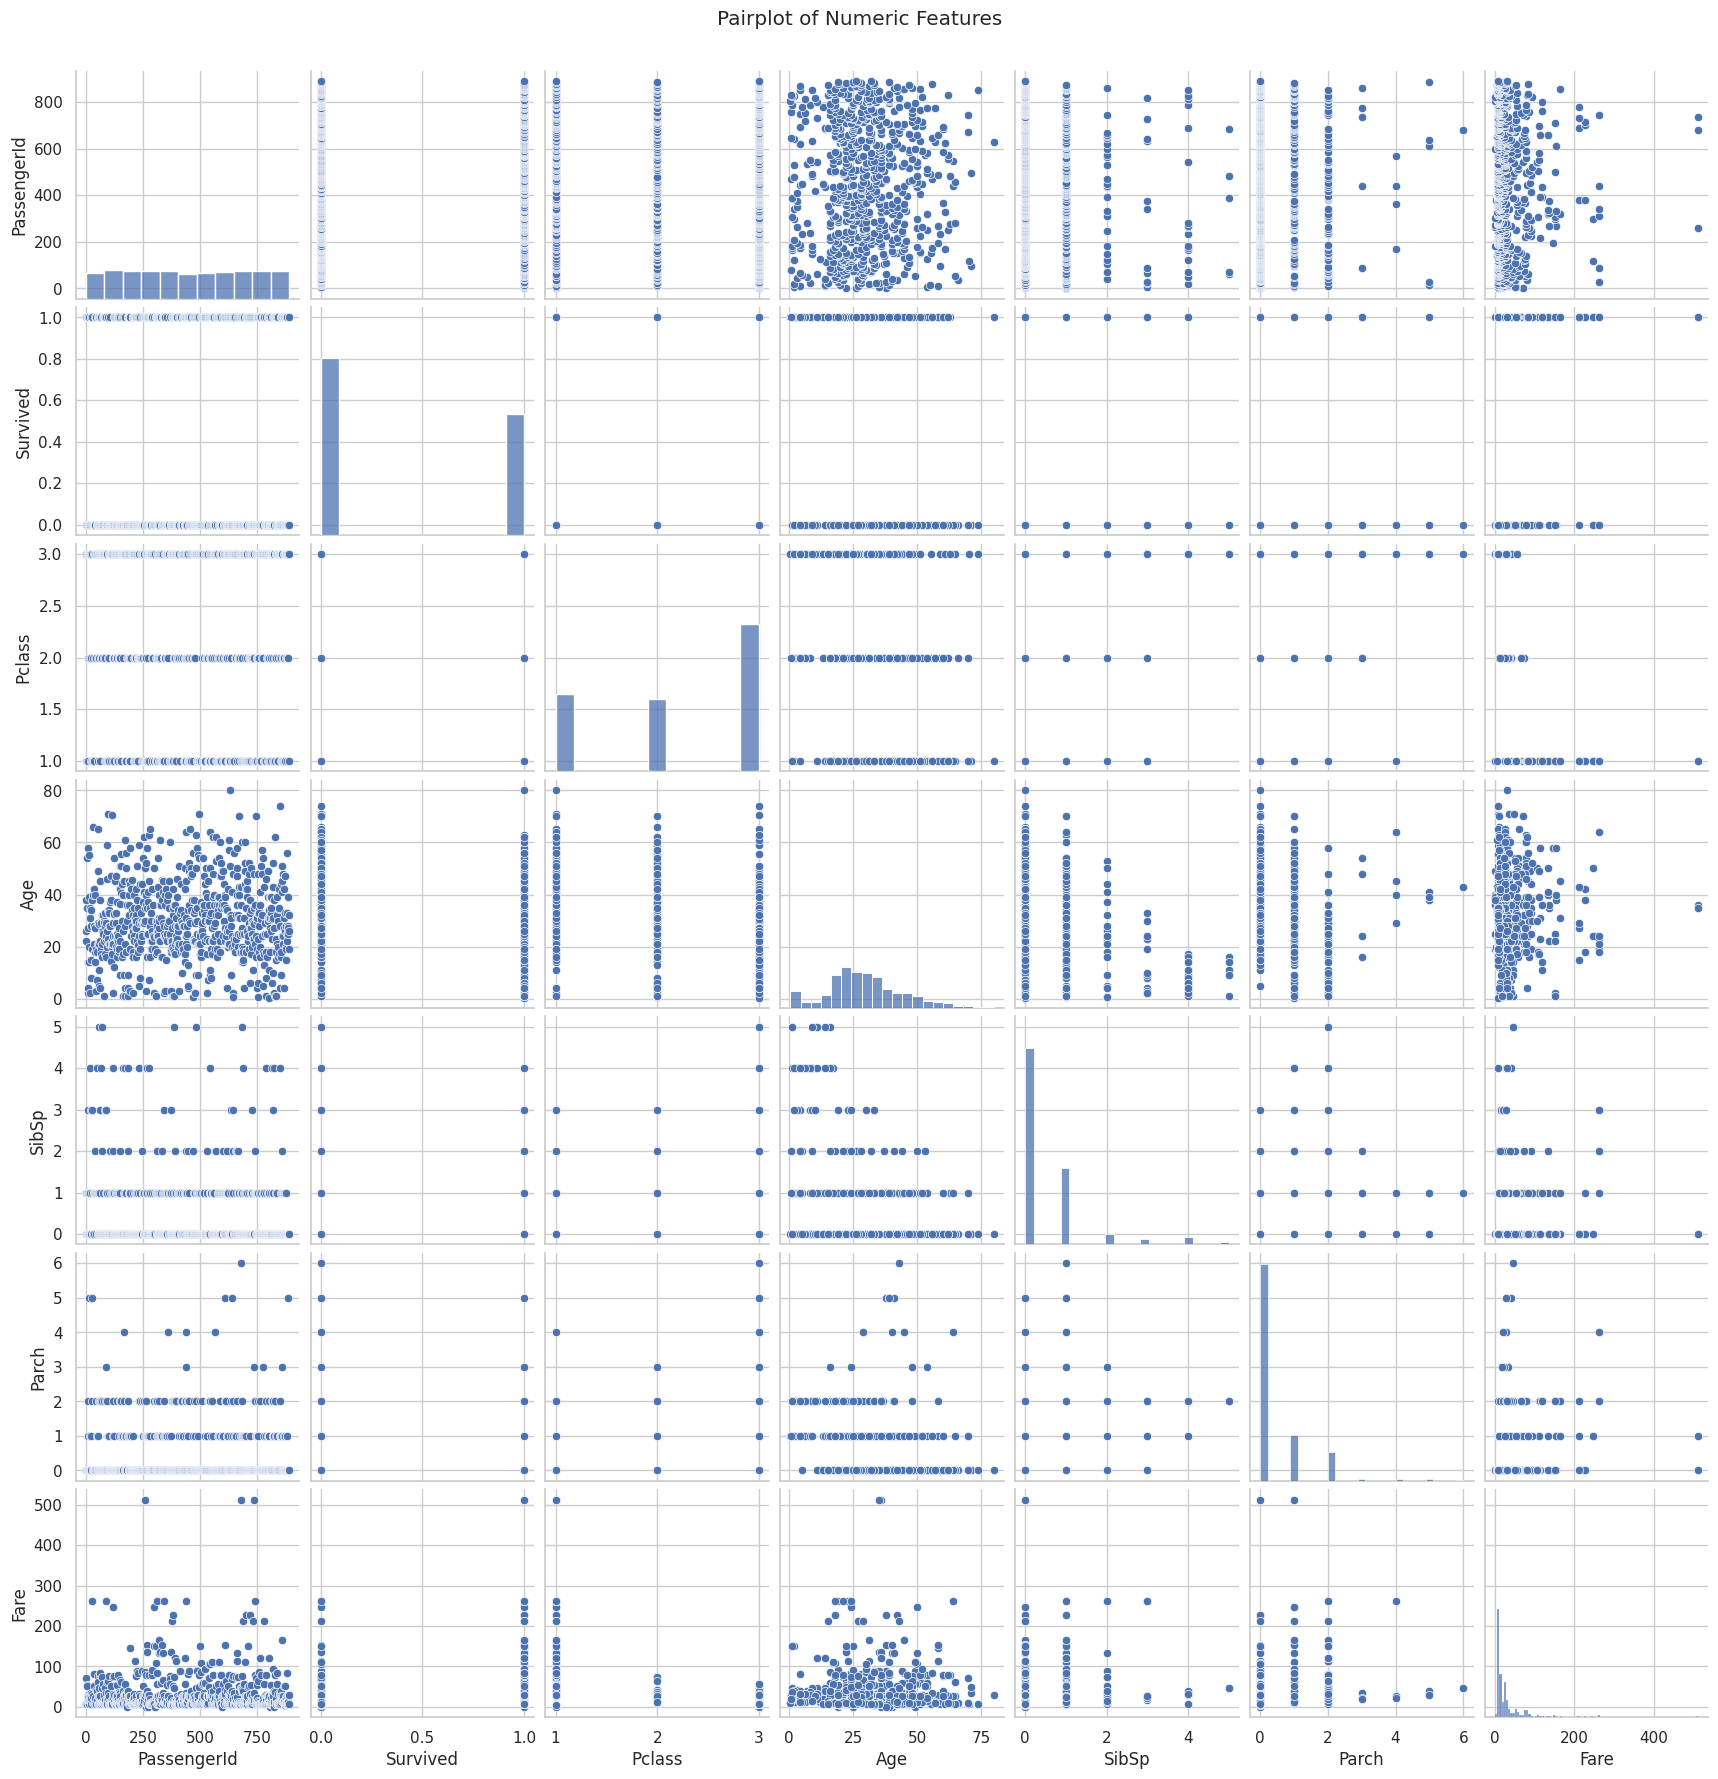

In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64']).dropna()
sns.pairplot(numeric_df)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

Correlation Matrix with Heatmap

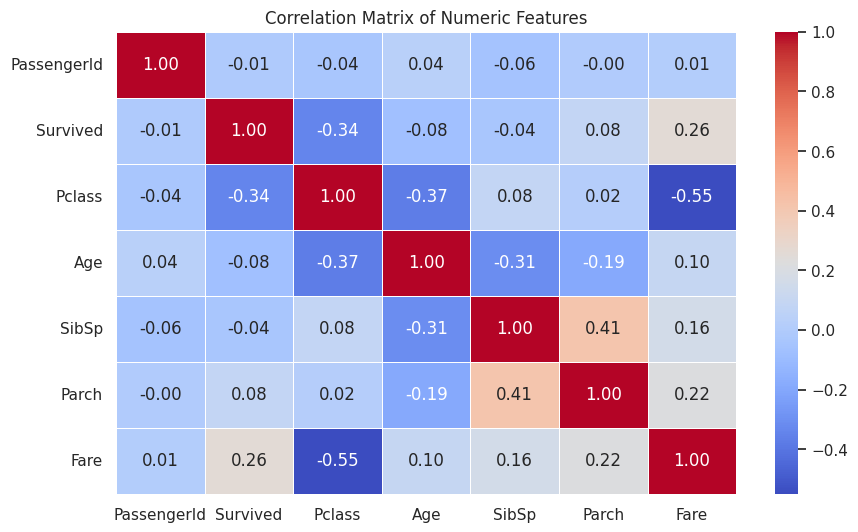

In [14]:

corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


Check for Class-Based Trends in Survival

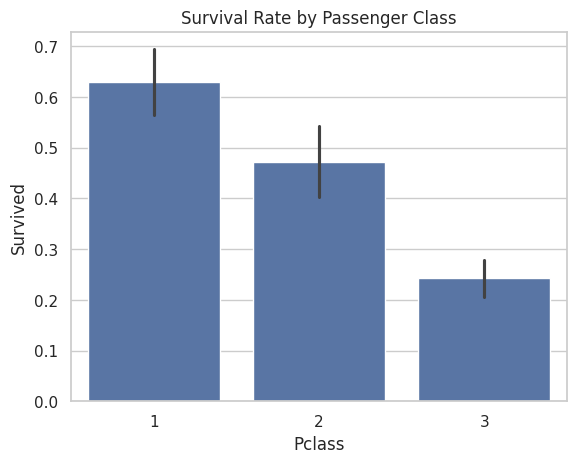

In [15]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

Survival by Gender

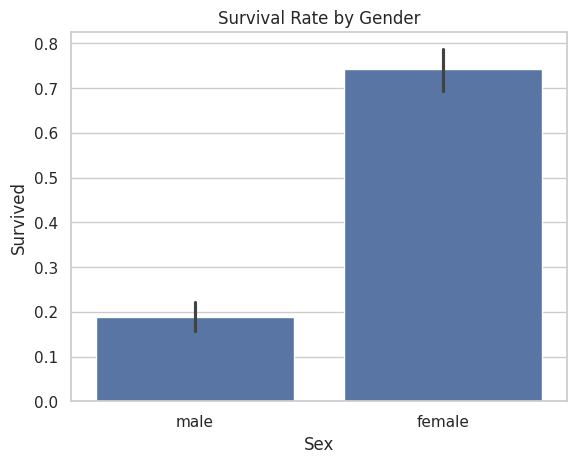

In [16]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()


Age Distribution and Survival

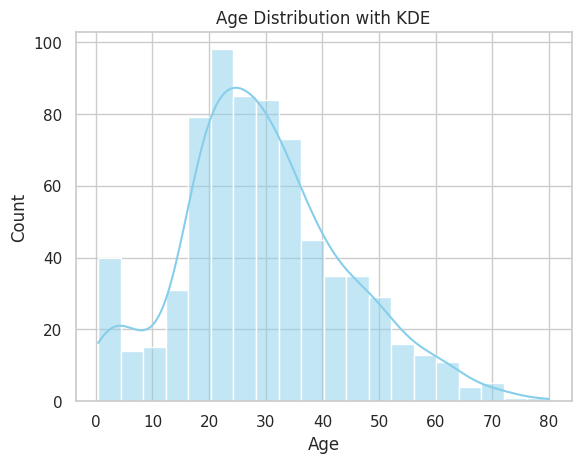

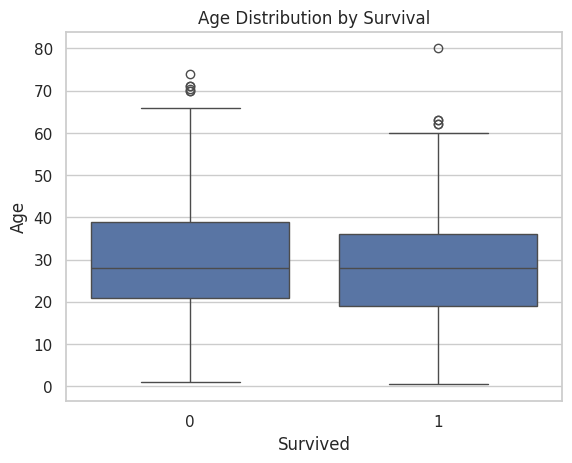

In [17]:
sns.histplot(df['Age'].dropna(), kde=True, color='skyblue')
plt.title("Age Distribution with KDE")
plt.show()

sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()


Fare Analysis – Outliers & Trends

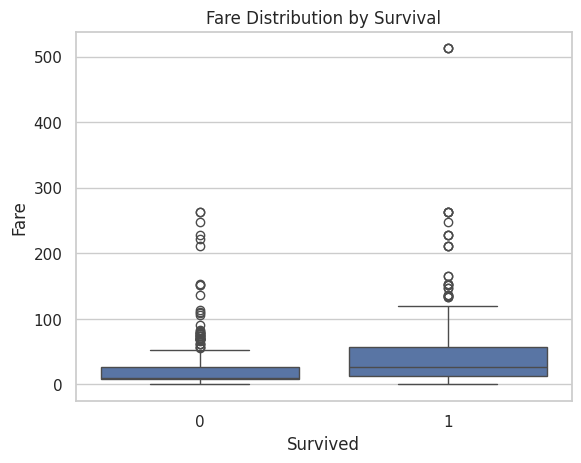

In [18]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()


Detect Missing Data (Anomaly)

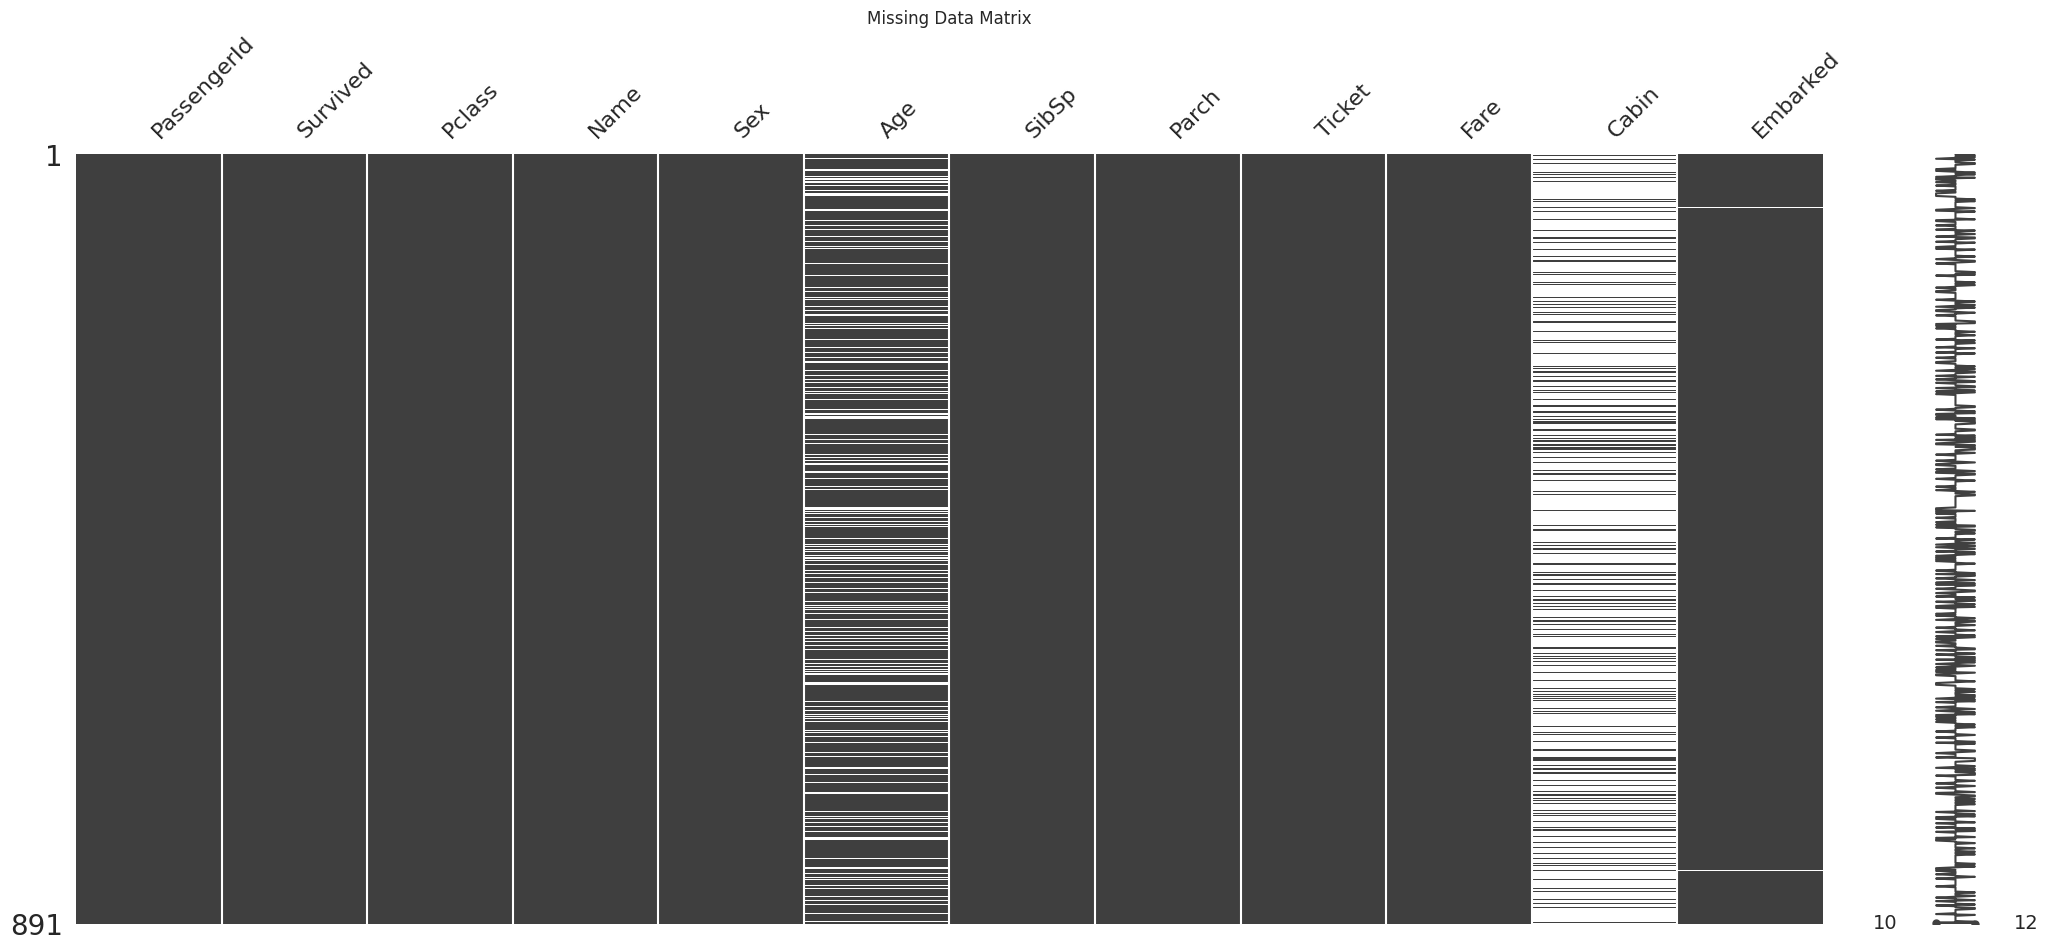

In [19]:
import missingno as msno

msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()


Bonus: Visual Anomaly Detection in Pairplot


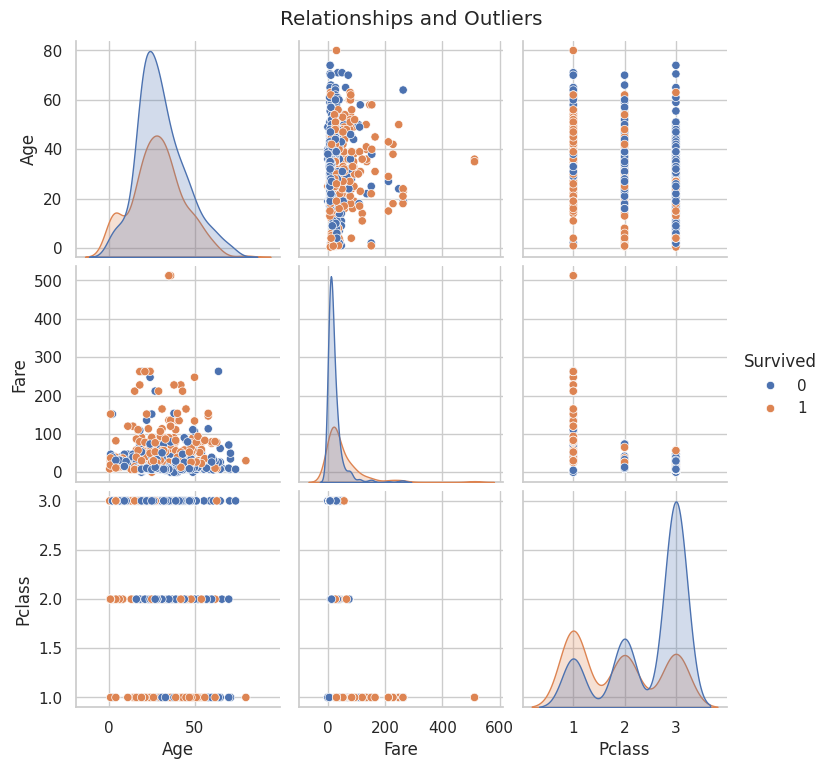

In [20]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')
plt.suptitle("Relationships and Outliers", y=1.02)
plt.show()


In [21]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [22]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


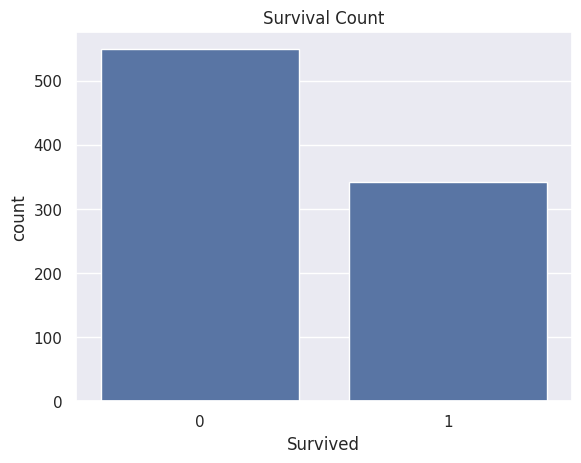

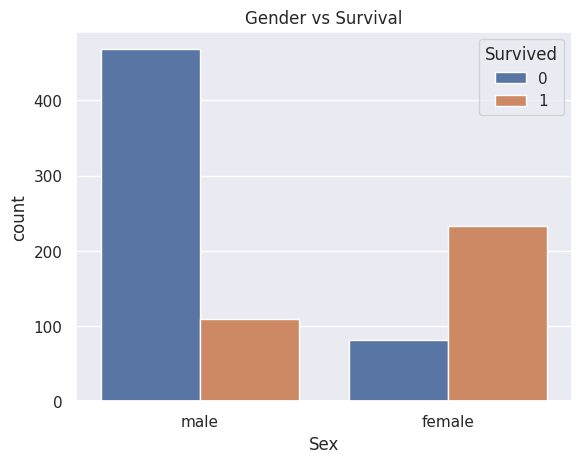

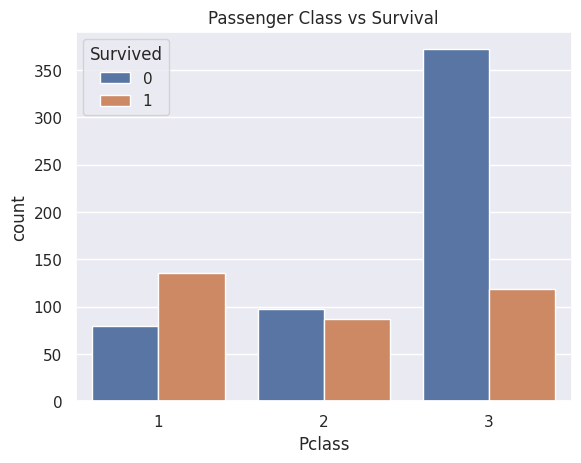

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Gender vs Survival')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Passenger Class vs Survival')
plt.show()


Numerical feature correlation heatmap

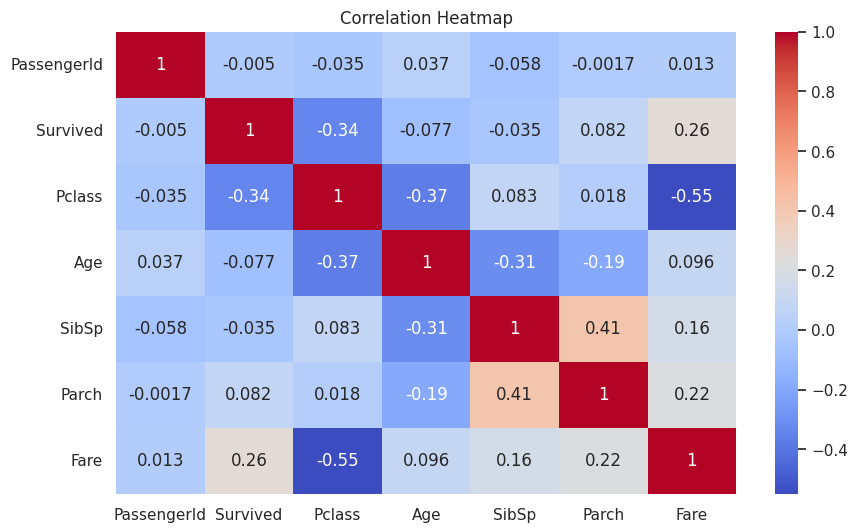

In [24]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
